<a href="https://colab.research.google.com/github/Mayank-Patel-9/Machine-Learning/blob/main/Unsupervised_Learning_MSPA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler

# Load the dataset (Assuming the dataset is in CSV format)
data = pd.read_csv('Mall_Customers.csv')

# Check for missing values
print(data.isnull().sum())

# Handle missing values (if any)
# For simplicity, we will drop rows with missing values (or use imputation if needed)
data = data.dropna()

# Selecting relevant columns (assuming the dataset has 'Age', 'Annual Income', and 'Spending Score' columns)
X = data[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]

# Standardizing the data (important for K-Means clustering)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print("Data after scaling: \n", X_scaled[:5])

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64
Data after scaling: 
 [[-1.42456879 -1.73899919 -0.43480148]
 [-1.28103541 -1.73899919  1.19570407]
 [-1.3528021  -1.70082976 -1.71591298]
 [-1.13750203 -1.70082976  1.04041783]
 [-0.56336851 -1.66266033 -0.39597992]]


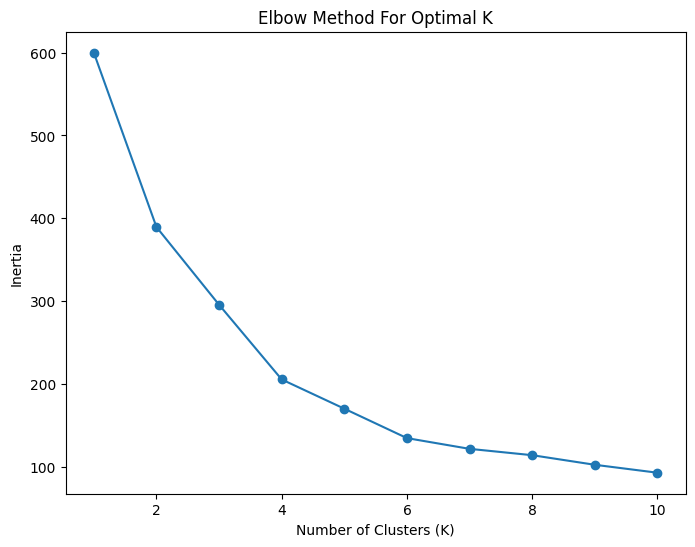

In [6]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, DBSCAN

# Calculate inertia (within-cluster sum of squares) for different K values
inertia = []
K_range = range(1, 11)  # Test for K from 1 to 10
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# Plot the Elbow Method graph
plt.figure(figsize=(8, 6))
plt.plot(K_range, inertia, marker='o')
plt.title('Elbow Method For Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.show()

In [19]:
# Apply K-Means with the chosen number of clusters (let's assume K=5)
kmeans = KMeans(n_clusters=5, random_state=42)
y_kmeans = kmeans.fit_predict(X_scaled)

# Add the cluster labels to the original data
data['Cluster'] = y_kmeans

print(data.head())

   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)  \
0           1    Male   19                  15                      39   
1           2    Male   21                  15                      81   
2           3  Female   20                  16                       6   
3           4  Female   23                  16                      77   
4           5  Female   31                  17                      40   

   Cluster  
0        2  
1        2  
2        3  
3        2  
4        2  


<Figure size 800x600 with 0 Axes>

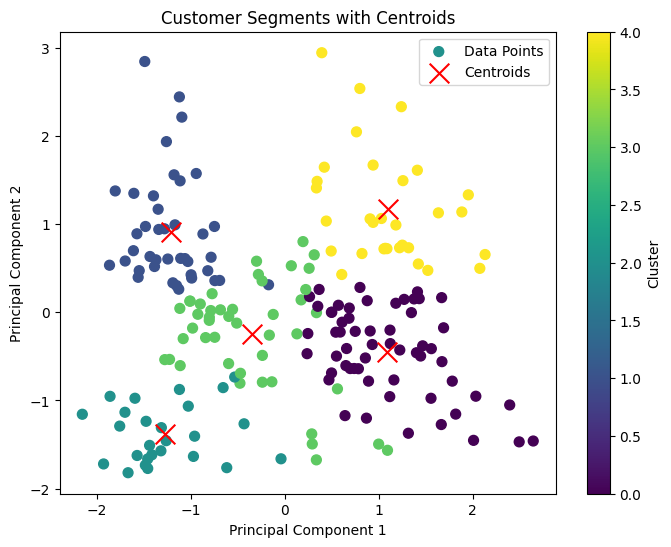

In [25]:
# Visualize the clusters in 2D space
plt.figure(figsize=(8, 6))

# Use PCA to reduce the data to 2D
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Plot the clusters
plt.figure(figsize=(8, 6))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_kmeans, cmap='viridis', s=50, label='Data Points')

# Plot the centroids
centroids_pca = pca.transform(kmeans.cluster_centers_)  # Transform cluster centers to PCA space
plt.scatter(centroids_pca[:, 0], centroids_pca[:, 1], s=200, c='red', marker='x', label='Centroids')

# Adding labels and title
plt.title('Customer Segments with Centroids')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()

# Show the plot
plt.colorbar(scatter, label='Cluster')
plt.show()

# X-axis: This represents the first principal component (PC1), which is the linear combination of the
# original features (Age, Annual Income, Spending Score) that explains the most variance.
# Y-axis: This represents the second principal component (PC2), which is orthogonal to PC1 and
# explains the next largest amount of variance in the data.

In [26]:
# Display the cluster centers (mean of the features for each cluster)
print("Cluster Centers (Age, Annual Income, Spending Score):")
print(kmeans.cluster_centers_)

Cluster Centers (Age, Annual Income, Spending Score):
[[ 1.17882975 -0.49388609 -0.32971553]
 [-0.42880597  0.97484722  1.21608539]
 [-0.93876351 -1.31473131  0.95680216]
 [-0.86957306 -0.23851652 -0.36060916]
 [ 0.39737911  1.11508909 -1.23126963]]


In [24]:
# You can also explore the characteristics of each cluster:
for i in range(5):
    print(f"Cluster {i} Summary:")
    print(data[data['Cluster'] == i].describe())

Cluster 0 Summary:
       CustomerID        Age  Annual Income (k$)  Spending Score (1-100)  \
count   58.000000  58.000000           58.000000               58.000000   
mean    68.775862  55.275862           47.620690               41.706897   
std     31.021805   8.571256           13.413567               15.697814   
min      9.000000  40.000000           19.000000                3.000000   
25%     45.500000  49.000000           39.250000               37.250000   
50%     69.500000  53.000000           48.500000               46.000000   
75%     92.500000  63.750000           59.750000               52.000000   
max    120.000000  70.000000           67.000000               60.000000   

       Cluster  
count     58.0  
mean       0.0  
std        0.0  
min        0.0  
25%        0.0  
50%        0.0  
75%        0.0  
max        0.0  
Cluster 1 Summary:
       CustomerID        Age  Annual Income (k$)  Spending Score (1-100)  \
count    40.00000  40.000000           40.000000